In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Train DataSet

In [4]:
tweetPath = '/content/drive/MyDrive/interIIT/tweet_train_cleaned.pkl'
articlePath = '/content/drive/MyDrive/interIIT/article_train_cleaned.pkl'

In [5]:
tweets = pd.read_pickle(tweetPath)
tweets.describe()

,Mobile_Tech_Tag
count,3095.000000
mean,0.250081
std,0.433129
min,0.000000
25%,0.000000
50%,0.000000
75%,0.500000
max,1.000000


In [6]:
articles = pd.read_pickle(articlePath)
articles.describe()

,Mobile_Tech_Flag
count,3095.000000
mean,0.243619
std,0.429335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
articles['Mobile_Tech_Flag'].value_counts()

0    2341
1     754
Name: Mobile_Tech_Flag, dtype: int64

In [8]:
newData = articles.drop(['Headline','urls'],axis=1)
newtweet = pd.DataFrame({
    'Text_ID': tweets['Tweet_ID'],
    'Text': tweets['Tweet'],
    'Mobile_Tech_Flag': tweets['Mobile_Tech_Tag']
})
newData = newData.append(newtweet)

In [9]:
newData.reset_index(drop=True,inplace=True)

### Val DataSet

In [10]:
tweetvPath = '/content/drive/MyDrive/interIIT/tweet_dev_cleaned.pkl'
artvPath = '/content/drive/MyDrive/interIIT/article_dev_cleaned.pkl'
vtweets = pd.read_pickle(tweetvPath)
varticle = pd.read_pickle(artvPath)

In [11]:
# vnewData = varticle.drop(['Headline','urls'],axis=1)
vnewtweet = pd.DataFrame({
    'Text_ID': vtweets['Tweet_ID'],
    'Text': vtweets['Tweet'],
    'Mobile_Tech_Flag': vtweets['Mobile_Tech_Tag']
})
# vnewData = vnewData.append(vnewtweet)
# vnewData.reset_index(drop=True,inplace=True)

In [12]:
vnewtweet

,Text_ID,Text,Mobile_Tech_Flag
0,tweet_2285,Jaise Apka Dimag Twitter Pe Baith ke Hugg Skte...,0
1,tweet_0934,No one thought to make restaurant workers elig...,0
2,tweet_3991,चीनी मोबाइल कंपनी रियलमी ने अपना Realme V15 5G...,1
3,tweet_0267,Barnsley have signed Orlando City striker Dary...,0
4,tweet_2619,Intezaar intezaar ka shor hay kone kone mei Ku...,0
...,...,...,...
500,tweet_3485,We are the pioneers of ____ Smartphone Camera ...,1
501,tweet_0549,QT ; An outbreak of the #Nipah virus in China...,0
502,tweet_1702,Loan de k wapis nahi kr rhi thi than ne mere ...,0
503,tweet_0251,"An outbreak of the Nipah virus in China, with ...",0


In [13]:
X_train = newData.Text.values
y_train = newData.Mobile_Tech_Flag.values
X_val = vnewtweet.Text.values
y_val = vnewtweet.Mobile_Tech_Flag.values

In [14]:
np.unique(y_train)

array([0, 1])

In [15]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla P100-PCIE-16GB


In [16]:
!nvidia-smi

Wed Mar 10 11:41:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    30W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
!pip install transformers

     |████████████████████████████████| 1.9MB 11.0MB/s 
     |████████████████████████████████| 890kB 40.6MB/s 
     |████████████████████████████████| 3.2MB 43.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=75e2410a785d90909da0f813c6f96c6293813ef48623567b7cac086d851e201c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [47]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  
            add_special_tokens=True,        
            max_length=MAX_LEN,             
            pad_to_max_length=True,         
            #return_tensors='pt',           
            return_attention_mask=True   
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [19]:
type(X_train)

numpy.ndarray

In [20]:
# all_tweets = newData.Text.values

# # Encode our concatenated data
# encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# # Find the maximum length
# max_len = max([len(sent) for sent in encoded_tweets])
# print('Max length: ', max_len)

In [49]:
X = X_train[4]
X

'Oppo K7x को 5G सपोर्ट और क्वाड-रियर कैमरा के साथ किया गया लॉन्च, ये है कीमत Oppo K7x को कंपनी की ओर से ओप्पो के नए 5G स्मार्टफ़ोन या ऐसा भी कह सकते हैं कि लेटेस्ट Oppo 5G स्मार्टफ़ोन के तौर पर चीन के बाजारों में लॉन्च कर दिया गया है। इस मोबाइल फोन के बारे में पिछले महीने कुछ जानकारी सामने आई थी लेकिन अब इसे आधिकारिक तौर पर लॉन्च कर दिया गया है। Oppo K7x में आपको कुछ खास फीचर्स भी मिल रहे है, इन फीचर्स में एक क्वाड-कैमरा सेटअप और ओक्टा-कोर प्रोसेसर भी मिल रहा है। इसके अलावा इस मोबाइल फोन दो अलग अलग रंगों के अलावा सिंगल रैम और स्टोरेज मॉडल में लॉन्च किया गया है। Oppo K7x की कीमत और अन्य डिटेल्स Oppo K7x को चीन के बाजार में CNY 1,499 यानी लगभग Rs 16,700 की कीमत में एक ही वैरिएंट यानी 6GB रैम और 128GB स्टोरेज में लॉन्च कर दिया गया है। इस मोबाइल फोन को ब्लैक मिरर और ब्लू शैडो कलर ऑप्शन में लॉन्च किया गया है। इसके अलावा आपको बता देते है कि इस मोबाइल फोन को चीन में प्री-ऑर्डर के लिए भी लाया जा चुका है, साथ ही बता देते है कि फोन की सेल 11 नवम्बर को शुरू हो जाने वाली है। अभी की चर्चा करें तो इस 

In [50]:
MAX_LEN = 300

token_ids = list(preprocessing_for_bert([X])[0].squeeze().numpy())
print('Original: ', X)
print('Token IDs: ', token_ids)

Original:  Oppo K7x को 5G सपोर्ट और क्वाड-रियर कैमरा के साथ किया गया लॉन्च, ये है कीमत Oppo K7x को कंपनी की ओर से ओप्पो के नए 5G स्मार्टफ़ोन या ऐसा भी कह सकते हैं कि लेटेस्ट Oppo 5G स्मार्टफ़ोन के तौर पर चीन के बाजारों में लॉन्च कर दिया गया है। इस मोबाइल फोन के बारे में पिछले महीने कुछ जानकारी सामने आई थी लेकिन अब इसे आधिकारिक तौर पर लॉन्च कर दिया गया है। Oppo K7x में आपको कुछ खास फीचर्स भी मिल रहे है, इन फीचर्स में एक क्वाड-कैमरा सेटअप और ओक्टा-कोर प्रोसेसर भी मिल रहा है। इसके अलावा इस मोबाइल फोन दो अलग अलग रंगों के अलावा सिंगल रैम और स्टोरेज मॉडल में लॉन्च किया गया है। Oppo K7x की कीमत और अन्य डिटेल्स Oppo K7x को चीन के बाजार में CNY 1,499 यानी लगभग Rs 16,700 की कीमत में एक ही वैरिएंट यानी 6GB रैम और 128GB स्टोरेज में लॉन्च कर दिया गया है। इस मोबाइल फोन को ब्लैक मिरर और ब्लू शैडो कलर ऑप्शन में लॉन्च किया गया है। इसके अलावा आपको बता देते है कि इस मोबाइल फोन को चीन में प्री-ऑर्डर के लिए भी लाया जा चुका है, साथ ही बता देते है कि फोन की सेल 11 नवम्बर को शुरू हो जाने वाली है। अभी की चर्चा क

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [51]:
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [52]:
train_inputs.shape

torch.Size([6190, 300])

In [53]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [56]:
%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 80, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-multilingual-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs


In [57]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=1e-4,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [58]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [59]:
set_seed(42)   
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.281066   |     -      |     -     |   20.06  
   1    |   40    |   0.130867   |     -      |     -     |   19.11  
   1    |   60    |   0.166099   |     -      |     -     |   19.15  
   1    |   80    |   0.151632   |     -      |     -     |   19.12  
   1    |   100   |   0.095748   |     -      |     -     |   19.11  
   1    |   120   |   0.112633   |     -      |     -     |   19.11  
   1    |   140   |   0.094010   |     -      |     -     |   19.11  
   1    |   160   |   0.093943   |     -      |     -     |   19.08  
   1    |   180   |   0.069475   |     -      |     -     |   19.07  
   1    |   193   |   0.080961   |     -      |     -     |   11.87  
----------------------------------------------------------------------
   1    |    -    |   0.130119   |  0.013618  |   99.80   |  189.77 

In [60]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    model.eval()

    all_logits = []
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [61]:
from sklearn.metrics import accuracy_score, roc_curve, auc
def evaluate_roc(probs, y_true):
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [62]:
probs = bert_predict(bert_classifier, val_dataloader)

AUC: 1.0000
Accuracy: 100.00%


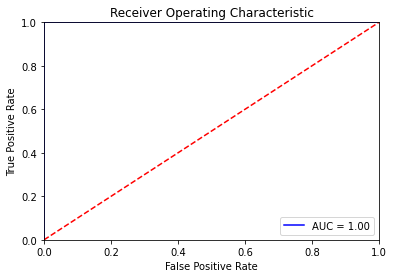

In [63]:
evaluate_roc(probs, y_val)

In [64]:
from sklearn.metrics import f1_score

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       126

    accuracy                           1.00       505
   macro avg       1.00      1.00      1.00       505
weighted avg       1.00      1.00      1.00       505



In [66]:
print(f1_score(y_val,y_pred))

1.0


In [67]:
print(confusion_matrix(y_val,y_pred))

[[379   0]
 [  0 126]]


In [68]:
vnewtweet.loc[:,'predicted_value'] = y_pred

In [69]:
wrongPred = vnewtweet[vnewtweet['Mobile_Tech_Flag'] != vnewtweet['predicted_value']]

In [70]:
wrongPred

,Text_ID,Text,Mobile_Tech_Flag,predicted_value


In [71]:
for i in range(len(wrongPred)):
  print(f'Text number {i} :',wrongPred.iloc[i,1])